<a href="https://colab.research.google.com/github/gapself/machine-learning-projects/blob/main/data-analysis/exc_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie 1

Przedstaw na wykresie rozrzutu, relację między spożyciem alkoholu w tygodniu (G1) a wiekiem (Age). 
Dodatkowo, osobnymi kolorami zaznacz w wykresie osoby których rodzice mają ten sam poziom wykształcenia (medu – wykształcenie matki, fedu – wykształcenie ojca).<br>
<b>Dodaj linię trendu do wykresu.</b>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

path = "DOM/PAD_06_PD.csv"
df = pd.read_csv(path,",")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


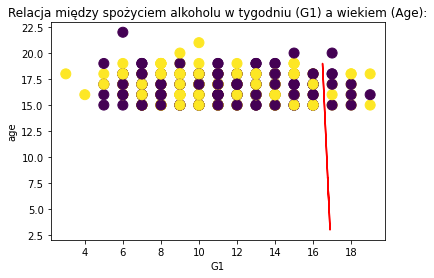

In [ ]:
x = df['G1']
y = df['age']

plt.xlabel('G1')
plt.ylabel('age')
plt.title('Relacja między spożyciem alkoholu w tygodniu (G1) a wiekiem (Age):')

model = LinearRegression()
x_ = np.array(x).reshape(-1,1)
y_ = np.array(y).reshape(-1,1)
y.shape
model.fit(x_,y_)
pred = model.predict(x_)
pred = pred.reshape(395)
plt.plot(pred,x, color="red")

plt.scatter(x,y, s=100, c=[df['Medu']==df['Fedu']])

plt.show()

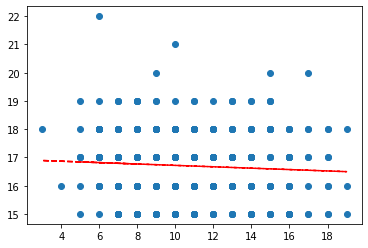

In [ ]:
x = df['G1']
y = df['age']
plt.scatter(x,y)

# trendline
x_ = np.array(x).reshape(-1,1)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# Zadanie 2

Przedstaw histogram wieku osobno dla kobiet i mężczyzn.

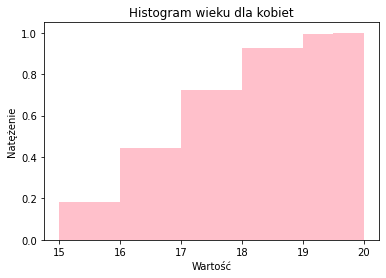

In [ ]:
female = df[df["sex"]=="F"]
plt.hist(female['age'], bins=10, cumulative=True, density=True, orientation="vertical", histtype="bar", color="pink")
plt.xlabel("Wartość")
plt.ylabel("Natężenie")
plt.title("Histogram wieku dla kobiet")
plt.show()

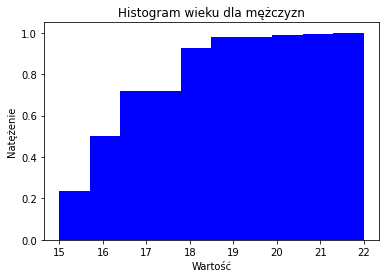

In [ ]:
male = df[df["sex"]=="M"]
plt.hist(male['age'], bins=10, cumulative=True, density=True, orientation="vertical", histtype="bar", color="blue")
plt.xlabel("Wartość")
plt.ylabel("Natężenie")
plt.title("Histogram wieku dla mężczyzn")
plt.show()

# Zadanie 3

Kolumna FamSize ma dwie wartości LE3 – 3 lub mniej, GT3 3 – więcej niż 3. Przedstaw za pomocą wykresu słupkowego jak wygląda średnia konsumpcja alkoholu (G1), w podziale na płeć, w obdwu grupach wydzielonych ze względu na FamSize.

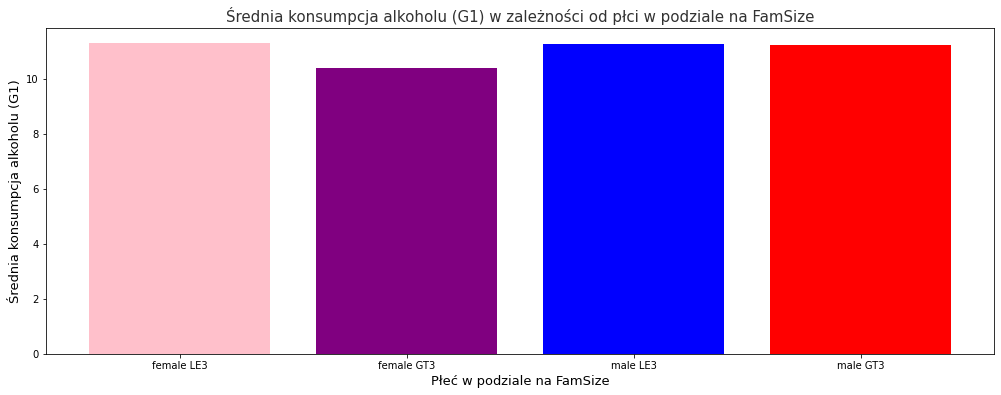

In [ ]:
female_le3 = female[female['famsize']=='LE3']['G1']
female_gt3 = female[female['famsize']=='GT3']['G1']

male_le3 = male[male['famsize']=='LE3']['G1']
male_gt3 = male[male['famsize']=='GT3']['G1']

plt.figure(figsize=(17,6))

plt.bar(["female LE3","female GT3"], [female_le3.mean(), female_gt3.mean()], color=["pink","purple"])
plt.bar(["male LE3","male GT3"], [male_le3.mean(), male_gt3.mean()], color=["blue","red"])

plt.title('Średnia konsumpcja alkoholu (G1) w zależności od płci w podziale na FamSize', fontsize=15, color='#323232')
# plt.xlabel('G1', fontsize=12)
plt.ylabel('Średnia konsumpcja alkoholu (G1)',fontsize=13)
plt.xlabel('Płeć w podziale na FamSize',fontsize=13)
plt.show()